<a href="https://colab.research.google.com/github/obinnachike/Protein_Sequencing/blob/main/PROTEIN_SEQUENCING_(G_protein_coupled_receptors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_curve
)


In [ ]:
labels = human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [ ]:
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [ ]:
human_data.describe()

,class
count,4380.000000
mean,3.504566
std,2.132134
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


In [ ]:
human_data['class'].value_counts()


,count
class,
6,1343
4,711
3,672
1,534
0,531
2,349
5,240


<Axes: title={'center': 'Class frequency for human data'}, xlabel='Frequency', ylabel='Protein class'>

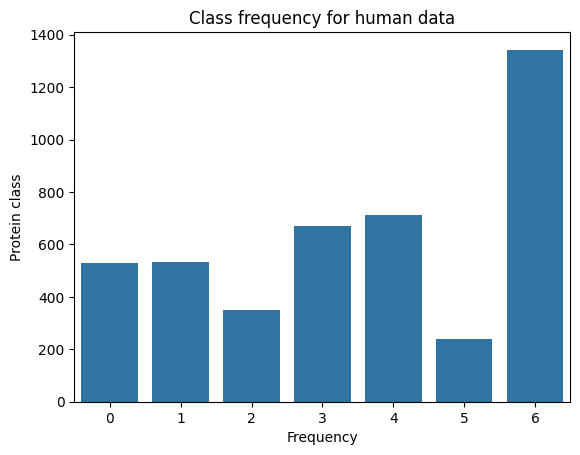

In [ ]:
counts = human_data['class'].value_counts().sort_index().reset_index()
counts.columns = ['Frequency','Protein class']
plt.title("Class frequency for human data")
sns.barplot(x='Frequency', y='Protein class', data=counts)


In [ ]:
labels = ['G protein coupled receptors','Tyrosine Kinase','Tyrosine phosphate', 'Synthetase','Synthase','Ion channel','Transcription Factor']

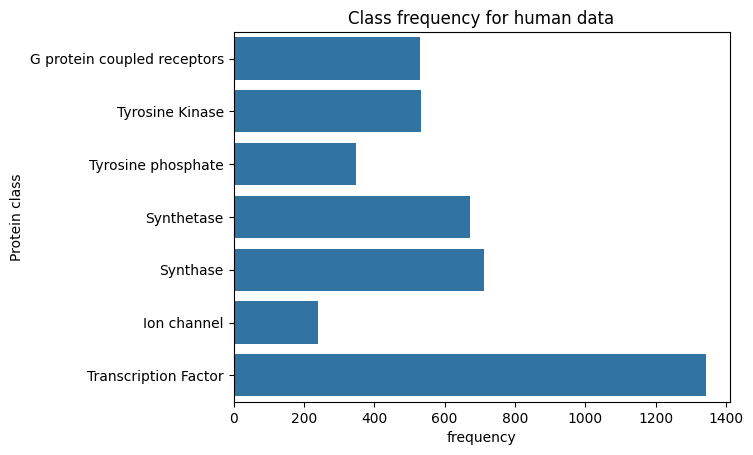

In [ ]:
sns.barplot(x = human_data['class'].value_counts().sort_index(), y = labels)
plt.title("Class frequency for human data")
plt.xlabel("frequency")
plt.ylabel("Protein class")
plt.show()

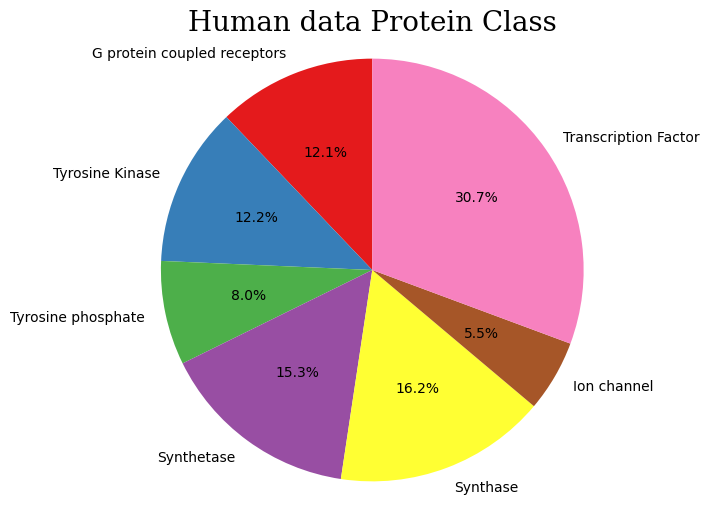

In [ ]:
plt.figure(figsize = (6,6))
font_dict = font = {
    'family':'serif',
    'color':'Black',
    'weight':'normal',
    'size':20,
}

a = np.random.random(7)
cs = cm.Set1(np.arange(7)/7.)
plt.pie(human_data["class"].value_counts().sort_index(), labels = labels, autopct = '%1.1f%%', colors = cs, startangle = 90)
plt.axis('equal')
plt.title("Human data Protein Class", fontdict = font_dict)
plt.show()



In [ ]:
chimp_data = pd.read_table('chimp_data.txt')
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [ ]:
chimp_data.describe()

,class
count,1682.000000
mean,3.491082
std,2.177486
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


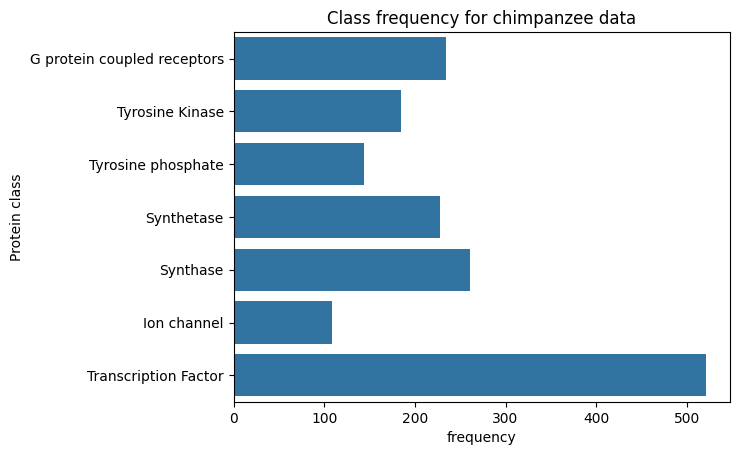

In [ ]:
sns.barplot(x = chimp_data['class'].value_counts().sort_index(), y = labels)
plt.title("Class frequency for chimpanzee data")
plt.xlabel("frequency")
plt.ylabel("Protein class")
plt.show()

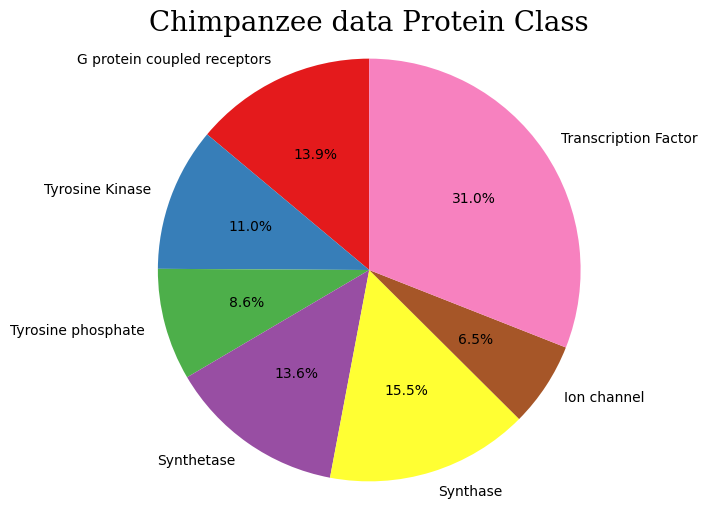

In [ ]:
plt.figure(figsize = (6,6))
font_dict = font = {
    'family':'serif',
    'color':'Black',
    'weight':'normal',
    'size':20,
}

a = np.random.random(7)
cs = cm.Set1(np.arange(7)/7.)
plt.pie(chimp_data["class"].value_counts().sort_index(), labels = labels, autopct = '%1.1f%%', colors = cs, startangle = 90)
plt.axis('equal')
plt.title("Chimpanzee data Protein Class", fontdict = font_dict)
plt.show()

In [ ]:
def getKmers(sequence, k = 6):
    return [sequence[x:x+k].lower() for x in range(len(sequence)- k + 1)]

cv = CountVectorizer(ngram_range = (4,4))

In [ ]:
# human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis = 1)
# huma_data = human_data.drop('sequence', axis = 1)

In [ ]:
# human_texts = list(human_data["words"])
# for item in range (len(human_data)):
    # human_text = " ".join(human_texts[items])

In [ ]:
# X_human = cv.fit_transform(human_texts)
# y_human = human_data.iloc[:,0].values

In [ ]:
# print(X_human.shape, y_human.shape)

In [ ]:
print(human_data.columns)


Index(['sequence', 'class', 'words'], dtype='object')


In [ ]:
# 1. Create k‑mer lists
human_data['words'] = human_data['sequence'].apply(getKmers)

# 2. Optional: drop raw sequences
# human_data = human_data.drop('sequence', axis=1)

# 3. Join k‑mer lists into single strings
human_texts = [" ".join(kmers) for kmers in human_data['words']]


# 4. Character‑level 4‑gram vectoriser (change ngram_range as needed)
cv = CountVectorizer(ngram_range=(4, 4), analyzer='char')
X_human = cv.fit_transform(human_texts)

# 5. Target labels
y_human = human_data['class'].values    # replace 'class' with actual column name

print(human_texts[1])

atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatctg atctgt tctgtt ctgttc tgttcg gttcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattca attcat ttcatt tcattg cattgc attgcc ttgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggcc aggcct ggccta gcctac cctacc ctaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtactg tactga actgat ctgatc tgatca gatcat atcatt tcattc cattct attcta ttctat tctatt ctattt tatttc atttcc tttccc ttcccc tccccc ccccct cccctc ccctct cctcta ctctat tctatt ctattg tattga attgat ttgatc tgatcc gatccc atcccc tcccca ccccac cccacc ccacct cacctc acctcc cctcca ctccaa tccaaa ccaaat caaata aaatat aatatc atatct tatctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatc taatca aatcac atcacc tcacca caccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gactaa

In [ ]:
from sklearn.model_selection import train_test_split
X_human_train,X_human_test,y_human_train,y_human_test = train_test_split(X_human, y_human, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_human = DecisionTreeClassifier()
dtree_human.fit(X_human_train,y_human_train)
dtree_human_pred = dtree_human.predict(X_human_test)

print("Accuracy for human data using DecisionTree Classifier is:", accuracy_score(dtree_human_pred, y_human_test))

Accuracy for human data using DecisionTree Classifier is: 0.6566210045662101


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_human = RandomForestClassifier()
rf_human.fit(X_human_train,y_human_train)
rf_human_pred = rf_human.predict(X_human_test)

print("Accuracy for human data using RandomForest Classifier is:", accuracy_score(rf_human_pred, y_human_test))

Accuracy for human data using RandomForest Classifier is: 0.7926940639269406


In [ ]:
import xgboost as xgb
xgb_human = xgb.XGBClassifier()
xgb_human.fit(X_human_train,y_human_train)
xgb_human_pred = xgb_human.predict(X_human_test)

print("Accuracy for human data using DecisionTree Classifier is:", accuracy_score(dtree_human_pred, y_human_test))

Accuracy for human data using DecisionTree Classifier is: 0.6566210045662101


MODELS FOR CHIMPANZEE

In [ ]:
chimp_data['words'] = chimp_data['sequence'].apply(getKmers)

# 2. Optional: drop raw sequences
# human_data = human_data.drop('sequence', axis=1)

# 3. Join k‑mer lists into single strings
chimp_texts = [" ".join(kmers) for kmers in chimp_data['words']]


# 4. Character‑level 4‑gram vectoriser (change ngram_range as needed)
cv = CountVectorizer(ngram_range=(4, 4), analyzer='char')
X_chimp = cv.fit_transform(chimp_texts)

# 5. Target labels
y_chimp = chimp_data['class'].values    # replace 'class' with actual column name

print(chimp_texts[1])

atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatcta atctat tctatt ctattc tattcg attcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattcg attcgc ttcgct tcgctg cgctgc gctgcc ctgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggct aggctt ggctta gcttac cttacc ttaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtacta tactaa actaat ctaatc taatca aatcat atcatt tcattc cattct attcta ttctat tctatt ctattc tattcc attccc ttcccc tccccc cccccc ccccct cccctc ccctct cctcta ctctac tctact ctactg tactgg actggt ctggtc tggtcc ggtccc gtcccc tcccca ccccac cccact ccactt cacttc acttct cttcta ttctaa tctaaa ctaaac taaaca aaacat aacatc acatct catctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatt taatta aattac attacc ttacca taccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gactaa

In [ ]:
X_chimp_train,X_chimp_test,y_chimp_train,y_chimp_test = train_test_split(X_chimp, y_chimp, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_chimp = DecisionTreeClassifier()
dtree_chimp.fit(X_chimp_train,y_chimp_train)
dtree_chimp_pred = dtree_chimp.predict(X_chimp_test)

print("Accuracy for Chimpanzee data using DecisionTree Classifier is:", accuracy_score(dtree_chimp_pred, y_chimp_test))

Accuracy for Chimpanzee data using DecisionTree Classifier is: 0.6342042755344418


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_chimp = RandomForestClassifier(n_estimators = 400)
rf_chimp.fit(X_chimp_train,y_chimp_train)
rf_chimp_pred = rf_chimp.predict(X_chimp_test)

print("Accuracy for chimpanzee data using RandomForest Classifier is:", accuracy_score(rf_chimp_pred, y_chimp_test))

Accuracy for chimpanzee data using RandomForest Classifier is: 0.7933491686460807


In [ ]:
import xgboost as xgb
xgb_chimp = xgb.XGBClassifier()
xgb_chimp.fit(X_chimp_train,y_chimp_train)
xgb_chimp_pred = xgb_chimp.predict(X_chimp_test)

print("Accuracy for chimpanzee data using DecisionTree Classifier is:", accuracy_score(xgb_chimp_pred, y_chimp_test))

Accuracy for chimpanzee data using DecisionTree Classifier is: 0.8194774346793349


In [ ]:
NB_chimp = MultinomialNB(alpha = 0.1)
NB_chimp.fit(X_chimp_train, y_chimp_train)
NB_chimp_pred = NB_chimp.predict(X_chimp_test)

print("Accuracy for chimpanzee data using MultinomialNB is:", accuracy_score(NB_chimp_pred, y_chimp_test))

Accuracy for chimpanzee data using MultinomialNB is: 0.4180522565320665


<Axes: >

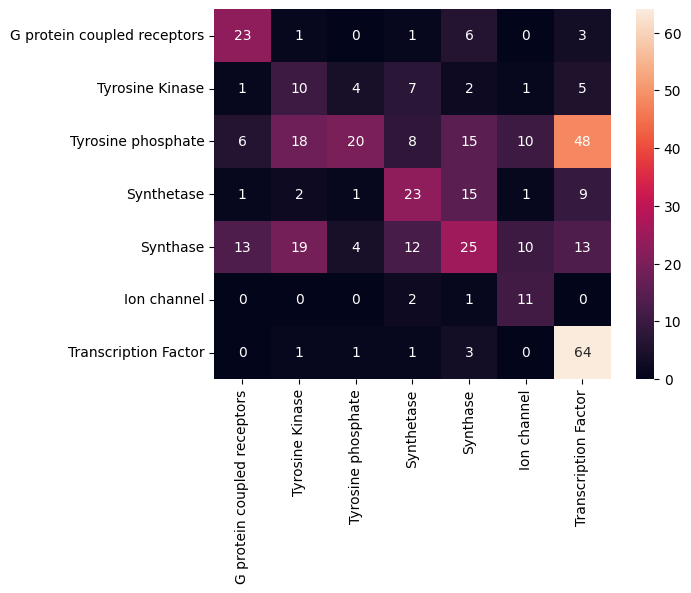

In [ ]:
cm = confusion_matrix(NB_chimp_pred, y_chimp_test)
sns.heatmap(cm, annot = True, xticklabels = labels, yticklabels = labels, fmt = "g")

In [ ]:
print(classification_report(NB_chimp_pred, y_chimp_test))

              precision    recall  f1-score   support

           0       0.52      0.68      0.59        34
           1       0.20      0.33      0.25        30
           2       0.67      0.16      0.26       125
           3       0.43      0.44      0.43        52
           4       0.37      0.26      0.31        96
           5       0.33      0.79      0.47        14
           6       0.45      0.91      0.60        70

    accuracy                           0.42       421
   macro avg       0.42      0.51      0.42       421
weighted avg       0.48      0.42      0.38       421



Seven different types of proteins which are common in both human and chimpanzees have been classified using machine learning algorithms like RandomForest, Decision Tree, XGBoost, annd Multinomial classification algorithms. we obtaiined the maximum accuracy with multinomial Naive bayes classifier on the both human and chimpanzee dataset with aroung 97.8% and 89.7% resp. we found out th